In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load and combine yelp data
yelp_test = pd.read_csv('../CSVs/yelp_test.csv',header=None,names=['sentiment','review'])
yelp_train =  pd.read_csv('../CSVs/yelp_train.csv',header=None,names=['sentiment','review'])
yelp = pd.concat([yelp_test, yelp_train])

In [19]:
yelp.head()

,sentiment,review
0,2,"Contrary to other reviews, I have zero complai..."
1,1,Last summer I had an appointment to get new ti...
2,2,"Friendly staff, same starbucks fair you get an..."
3,1,The food is good. Unfortunately the service is...
4,2,Even when we didn't have a car Filene's Baseme...


In [ ]:
# Load imdb data
imdb = pd.read_csv('../CSVs/IMDB Dataset.csv')

In [20]:
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [16]:
# Check for no null data before using if/else
imdb.isna().sum()

review       0
sentiment    0
dtype: int64

In [18]:
imdb['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [21]:
# Change form to match other two datasets
imdb['sentiment'] = imdb['sentiment'].apply(lambda x: 2 if x=='positive' else 1)
imdb.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,2
1,A wonderful little production. <br /><br />The...,2
2,I thought this was a wonderful way to spend ti...,2
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",2


In [12]:
# Load and combine Amazon data
amazon_test = pd.read_csv('../CSVs/amazon_test_processed.txt',sep='\t',header=None,names=['sentiment','review'])
amazon_train = pd.read_csv('../CSVs/amazon_train_processed.txt',sep='\t',header=None,names=['sentiment','review'])
amazon = pd.concat([amazon_test,amazon_train])

In [22]:
amazon.head()

,sentiment,review
0,2,Great CD: My lovely Pat has one of the GREAT v...
1,2,One of the best game music soundtracks - for a...
2,1,Batteries died within a year ...: I bought thi...
3,2,"works fine, but Maha Energy is better: Check o..."
4,2,Great for the non-audiophile: Reviewed quite a...


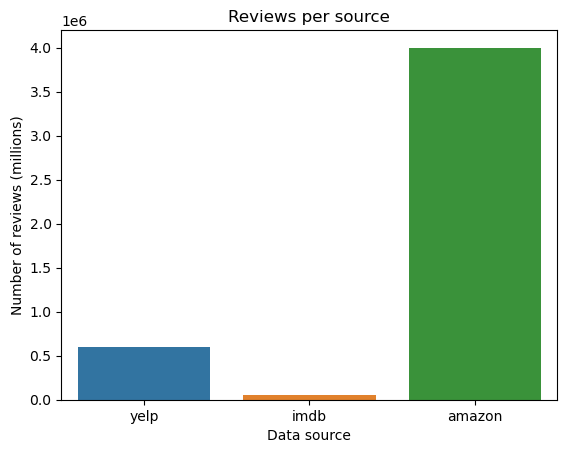

In [96]:
sns.countplot(x='source',data=words)
plt.title('Reviews per source')
plt.xlabel('Data source')
plt.ylabel('Number of reviews (millions)')
plt.show()

Here we can see that the number of Amazon reviews dwarfs the reviews form either of the other datasets. 

In [27]:
def analyze(name, reviews):
    '''Determines the total number of reviews for each dataset
    and the percentage that is positive'''
    length = len(reviews)
    positive = len(reviews[reviews['sentiment'] == 2])
    print(f'The {name} dataset contains {len(reviews)} reviews, \
of which {positive} are positive ({round(positive/length*100, 2)}%)')

In [28]:
analyze('Yelp',yelp)
analyze('IMDB', imdb)
analyze('Amazon',amazon)

The Yelp dataset contains 598000 reviews, of which 299000 are positive (50.0%)
The IMDB dataset contains 50000 reviews, of which 25000 are positive (50.0%)
The Amazon dataset contains 3999612 reviews, of which 1999805 are positive (50.0%)


It appears that each of the three datasets is perfectly balanced, with exactly half positive reivews and half negative, with an error of at most 1 review out of nearly 4 million. 

In [40]:
def wordcount(reviews):
    '''Returns a number of words for each review'''
    return reviews['review'].apply(lambda x: len(x.split()))

In [66]:
def review_lengths(name, reviews):
    '''Finds statistics on the length (in words) of each review'''
    words = wordcount(reviews)
    positive_words = wordcount(reviews[reviews['sentiment'] == 2])
    negative_words = wordcount(reviews[reviews['sentiment'] == 1])
    print(f'The average review in the {name} dataset contains {round(words.mean(),1)} words, \
with a standard deviation of {round(words.std(),1)}.')
    print(f'The average positive review is {round(positive_words.mean(),1)} words long, \
(s.d. {round(positive_words.std(), 1)}) while the average negative comment is \
{round(negative_words.mean(),1)} words (s.d. {round(negative_words.std(),1)}).')
    print(f'The longest comment has {words.max()} words, and the shortest has only {words.min()}.')
    print(f'There are {len(words[words==words.min()])} reviews of length {words.min()}. Here is a sample: ')
    print(reviews[words==words.min()].head())
    return words

In [74]:
yelp_words = pd.DataFrame(review_lengths('yelp',yelp))
yelp_words['source'] = 'yelp'

The average review in the yelp dataset contains 133.0 words, with a standard deviation of 122.5.
The average positive review is 114.5 words long, (s.d. 104.6) while the average negative comment is 151.5 words (s.d. 135.6).
The longest comment has 1052 words, and the shortest has only 1.
There are 321 reviews of length 1. Here is a sample: 
      sentiment    review
705           2   Decent!
2309          1    Closed
2612          1  terrible
4409          2  Delycios
6301          2  Mojitos.


From the above, we can see that Yelp has hundreds of 1-word reviews, while as we see below, neither of the other data sources have any. Perhaps this is from a content moderation policy on the other two sites. 

In [76]:
imdb_words = pd.DataFrame(review_lengths('imdb',imdb))
imdb_words['source'] = 'imdb'

The average review in the imdb dataset contains 231.2 words, with a standard deviation of 171.3.
The average positive review is 232.8 words long, (s.d. 177.5) while the average negative comment is 229.5 words (s.d. 164.9).
The longest comment has 2470 words, and the shortest has only 4.
There are 1 reviews of length 4. Here is a sample: 
                                                  review  sentiment
28920  Primary plot!Primary direction!Poor interpreta...          1


The above review actually appears to have 6 words, not 4, but the user did not use a space after punctuation. This could potentially be a problem. 

In [77]:
amazon_words = pd.DataFrame(review_lengths('amazon',amazon))
amazon_words['source'] = 'amazon'

The average review in the amazon dataset contains 78.5 words, with a standard deviation of 42.9.
The average positive review is 75.5 words long, (s.d. 42.9) while the average negative comment is 81.5 words (s.d. 42.6).
The longest comment has 1833 words, and the shortest has only 2.
There are 4 reviews of length 2. Here is a sample: 
         sentiment                                             review
567122           2  Great: TeTerriffic!Terriffic!Terriffic!Terriff...
759135           1  Disappointing: Thisis.the.very.first.book.by.h...
1373881          1  booo: booooooooooooooooooooooooooooooooooooooo...
2014826          1  hahahaha........hahahahaha: hahahahahaha.........


Once again, the so-called "2-word" reviews are made up of more than 2 words seperated by punctuation rather than spaces. It seems plausible that reviews in this dataset had a minimum number of characters, rather than words, or that the software counting the words recognized punctuation as a separator. This minimum may have been imposed either by the site itself on its users, or by the people who extracted the data for sentiment analysis. No such restriction appears to exist on Yelp.

In [78]:
words = pd.concat([yelp_words, imdb_words, amazon_words])

In [80]:
words.head()

,review,source
0,126,yelp
1,71,yelp
2,15,yelp
3,53,yelp
4,138,yelp


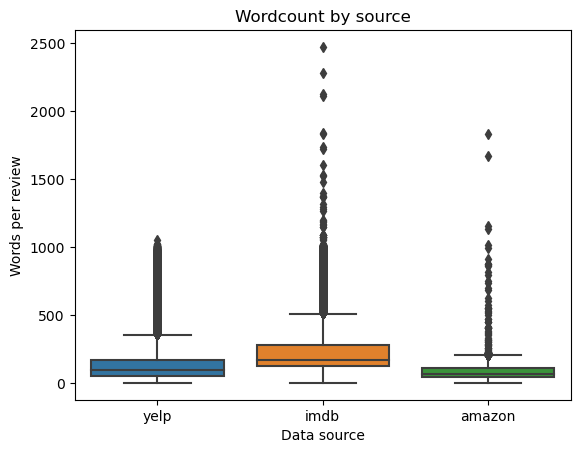

In [87]:
sns.boxplot(x='source',y='review',data=words)
plt.title('Wordcount by source')
plt.ylabel('Words per review')
plt.xlabel('Data source')
plt.show()

The boxplot shows that most of the reviews sit in a very narrow range in the low hundreds of words, with Amazon having the shortest reviews overall and IMDB having the longest. Many high-wordcount outliers exist for each source, with Yelp having the least extreme outliers (rarely over one thousand words) and IMDB having the most extreme, with a few in the two thousands. 